In this notebook we do some simple data exploration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
path_to_repo = "/Users/jamie/Desktop/GitHubProjects/BICKER/"

We define the $k$-range covered.

In [3]:
k1 = np.logspace(np.log(3.0e-4), np.log(.005), 4, base=np.e)
k2 = np.arange(.00501,.301,.0025)
k3 = np.logspace(np.log(.301), np.log(10.0), 25, base=np.e)
k = np.hstack([k1, k2, k3])

We define a list of kernels that should look similar,

In [4]:
files = ["1000_cosmo_b1_b1_b1_f.npy", 
         "1000_cosmo_b1_b1_b1.npy", 
         "1000_cosmo_b1_b1_f_f.npy", 
         "1000_cosmo_b1_b1_f.npy", 
         "1000_cosmo_b1_f_f_f.npy", 
         "1000_cosmo_b1_f_f.npy"]

and load the files.

In [5]:
kernels = []
for file in files:
    kernels.append(np.load(path_to_repo+"data/"+file))
kernels = np.stack(kernels)

We plot the kernels for the first cosmology,

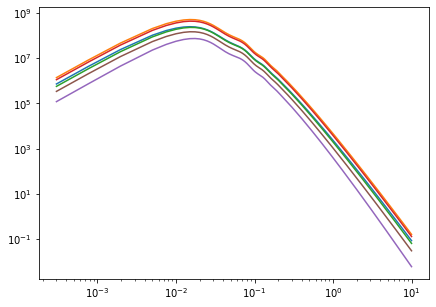

In [6]:
plt.figure(figsize=(7,5))
for i in range(kernels.shape[0]):
    plt.loglog(k, kernels[i,0,:])
plt.show()

From the plot above we can see that the functional form of these kernels is very similar.

The large number of kernels is probably going to mean we need to emply some kind of dimensionality reduction. We try a PCA with 40 componenets.

In [7]:
vectors = []
vals = []
for i in range(kernels.shape[0]):
    pca = PCA(n_components=40)
    pca.fit(kernels[i,:,:])
    
    vectors.append(pca.components_)
    vals.append(pca.transform(kernels[i,:,:]))
vectors = np.stack(vectors)
vals = np.stack(vals)

In [8]:
vectors.shape

(6, 40, 148)

We can plot the first three basis vectors for one of the kernels.

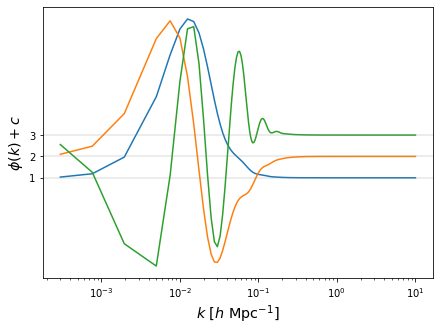

In [9]:
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(k, (vectors[0][:3,:]+0.05*np.arange(3).reshape(-1,1)).T)
for i in 0.05*np.arange(3):
    ax.axhline(i,color='grey',alpha=0.2)
ax.set_xscale('log')
ax.set_yticks(0.05*np.arange(3))
ax.set_yticklabels(np.arange(3)+1)
ax.set_ylabel(r"$\phi(k)+c$",fontsize="x-large")
ax.set_xlabel(r'$k \ [h \ \mathrm{Mpc}^{-1}]$', fontsize='x-large')
plt.show()

We can also plot these basis vectors for each of the kernels.

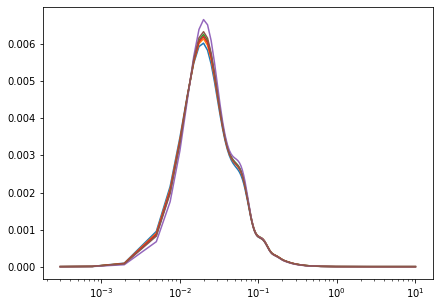

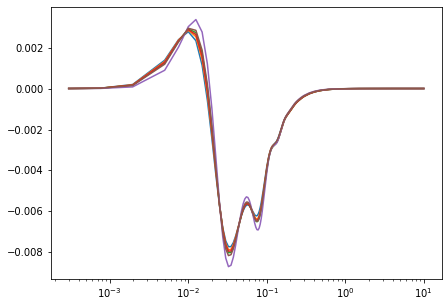

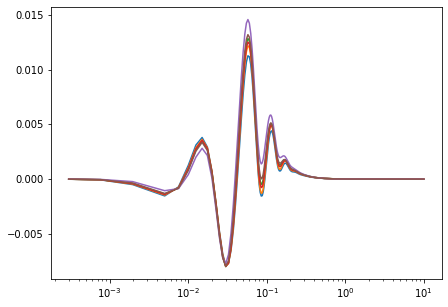

In [10]:
for j in range(3):
    plt.figure(figsize=(7,5))
    for i in range(kernels.shape[0]):
        plt.semilogx(k, k*vectors[i,j,:])
    plt.show()

We can see these basis vectors look very similar for each of the kernels.

As a quck test we can see how much error is introduced by the dimensionalit reduction.

In [11]:
pca_preds = []
for i in range(kernels.shape[0]):
    pca_preds.append(np.einsum("in, nm -> im",vals[i],vectors[i]))
pca_preds = np.stack(pca_preds)

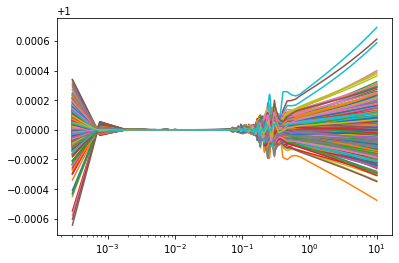

In [12]:
plt.semilogx(k, ((pca_preds[0,:,:]+kernels[0,:,:].mean(axis=0))/kernels[0,:,:]).T)
plt.show()

The plot above shows this is lower than 0.1%.